Import modules

In [1]:
import pyPCG as pcg
import pyPCG.io as signal_io

Read in example data

In [2]:
data, fs = signal_io.read_signal_file("example.mat","mat")
example = pcg.pcg_signal(data,fs)

Create a pipeline to center and scale the signal
(This could have been done with `pcg.normalize`)

In [3]:
norm = pcg.process_pipeline(pcg.zero_center,pcg.unit_scale)
normd = norm.run(example)

Plot the data

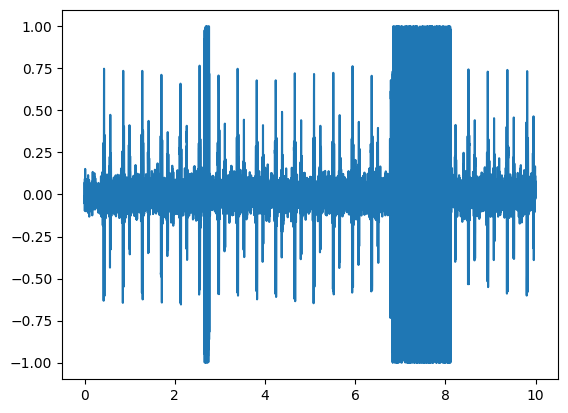

In [4]:
pcg.plot(normd)

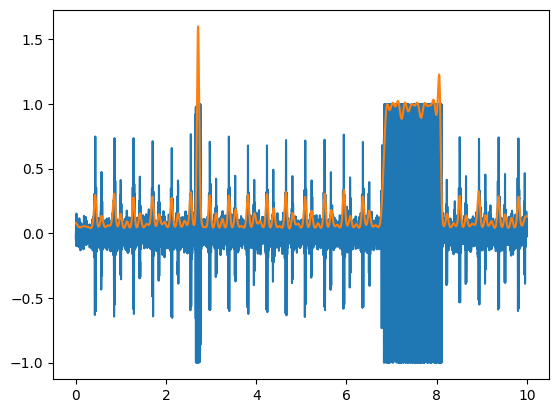

In [5]:
import pyPCG.preprocessing as preproc

h_env = preproc.homomorphic(normd)
pcg.plot(normd)
pcg.plot(h_env)

['Zero center', 'Unit scale', 'LP Filter (order-6, cut-100)', 'HP Filter (order-6, cut-20)']


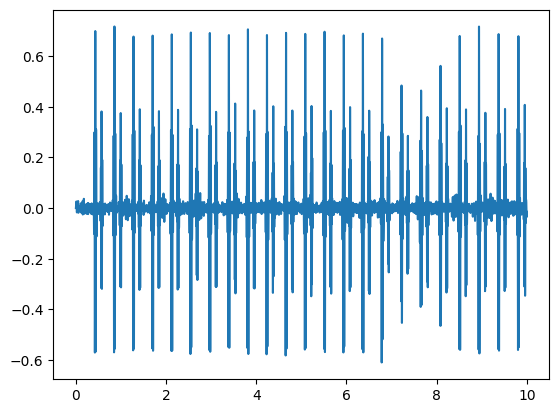

In [6]:
BP_filterd = preproc.filter(preproc.filter(normd,6,100,"LP"),6,20,"HP")
pcg.plot(BP_filterd)
print(BP_filterd.processing_log)

['Zero center', 'Unit scale', 'Wavelet denoise (family-coif4, level-5, th-0.2)', 'Homomorphic envelope (order-6,cut-8)']


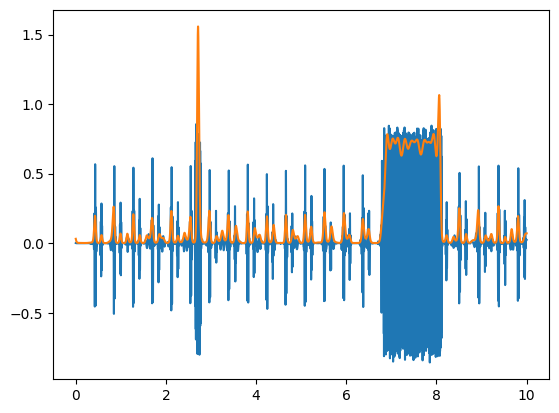

In [7]:
WT_den = preproc.wt_denoise(normd)
h_wt = preproc.homomorphic(WT_den)
pcg.plot(WT_den)
pcg.plot(h_wt)
print(h_wt.processing_log)